In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

#from google.colab import drive

#drive.mount('/content/drive')

In [4]:
!pip install folium

In [5]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
import pytz

In [6]:
#train = pd.read_csv('/content/drive/MyDrive/train-neeraj.csv', parse_dates=['Dates'])
#test = pd.read_csv('test.csv', parse_dates=['Dates'], index_col='Id')
train = pd.read_csv('train.csv', parse_dates=['Dates'])

In [7]:
train.tail()

Dates                Category  \
878044 2003-01-06 00:15:00                 ROBBERY   
878045 2003-01-06 00:01:00           LARCENY/THEFT   
878046 2003-01-06 00:01:00           LARCENY/THEFT   
878047 2003-01-06 00:01:00               VANDALISM   
878048 2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript DayOfWeek PdDistrict  \
878044           ROBBERY ON THE STREET WITH A GUN    Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO    Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO    Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)    Monday    BAYVIEW   

       Resolution                     Address           X          Y  
878044       NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045       NONE        600 Block of EDNA ST -122.447364  37.731948  
878046       NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047       NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048       NONE    1800 Block of NEWCOMB AV -122.394926  37.738212

In [8]:
train.head()

Dates        Category                      Descript  \
0 2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [9]:
train['Year'] = train['Dates'].map(lambda x: x.year)
train['Week'] = train['Dates'].map(lambda x: x.week)
train['Hour'] = train['Dates'].map(lambda x: x.hour)

In [10]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Year          0
Week          0
Hour          0
dtype: int64

In [11]:
train['PdDistrict'].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [12]:
train['Resolution'].unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'],
      dtype=object)

In [13]:
train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

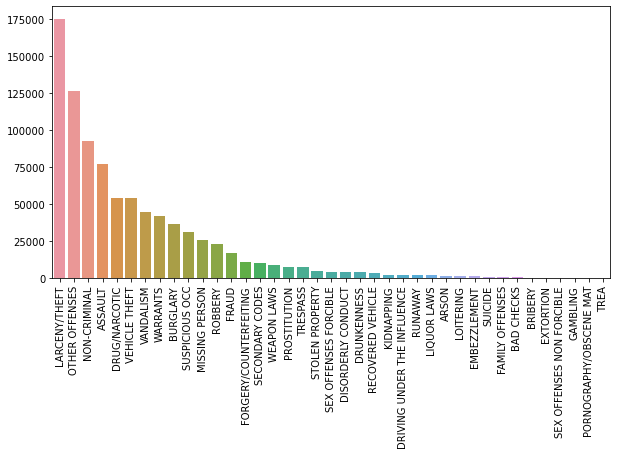

In [14]:
category_vc = train['Category'].value_counts()
plt.figure(figsize=(10,5))
plt.tick_params(axis='x', rotation=90)
sns.barplot(x=category_vc.index, y=category_vc.values)
plt.show()

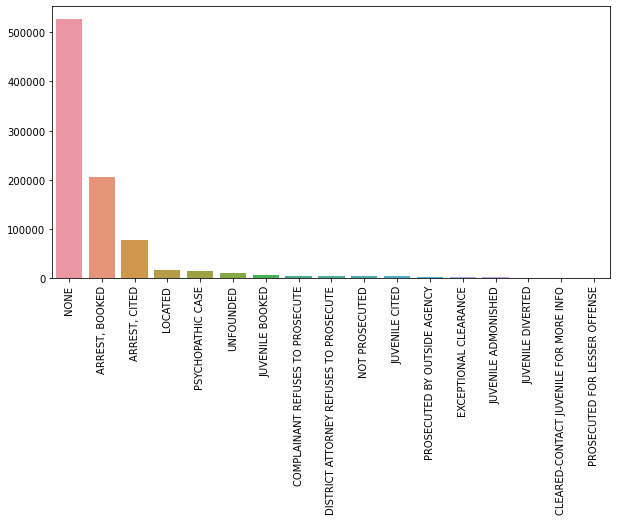

In [15]:
resolution_vc = train['Resolution'].value_counts()
plt.figure(figsize=(10,5))
plt.tick_params(axis='x', rotation=90)
sns.barplot(x=resolution_vc.index, y=resolution_vc.values)
plt.show()

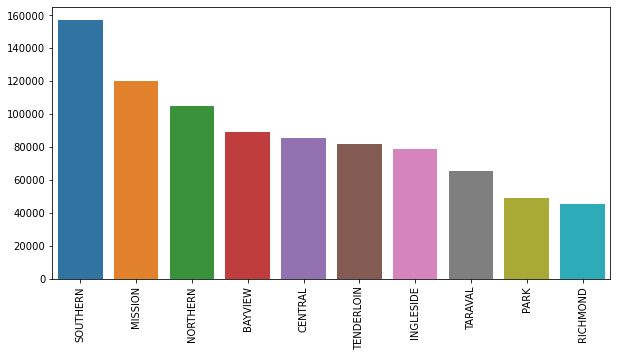

In [16]:
district_vc = train['PdDistrict'].value_counts()
plt.figure(figsize=(10,5))
plt.tick_params(axis='x', rotation=90)
sns.barplot(x=district_vc.index, y=district_vc.values)
plt.show()

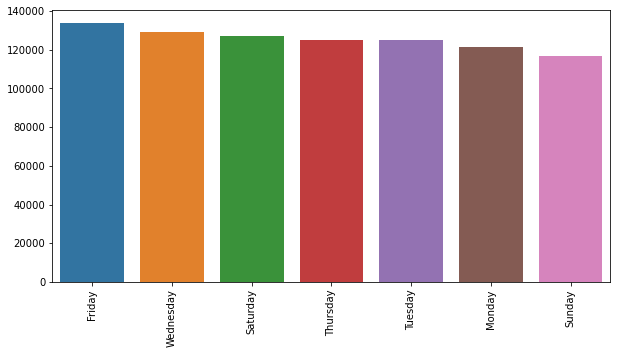

In [17]:
dayofweek_vc = train['DayOfWeek'].value_counts()
plt.figure(figsize=(10,5))
plt.tick_params(axis='x', rotation=90)
sns.barplot(x=dayofweek_vc.index, y=dayofweek_vc.values)
plt.show()

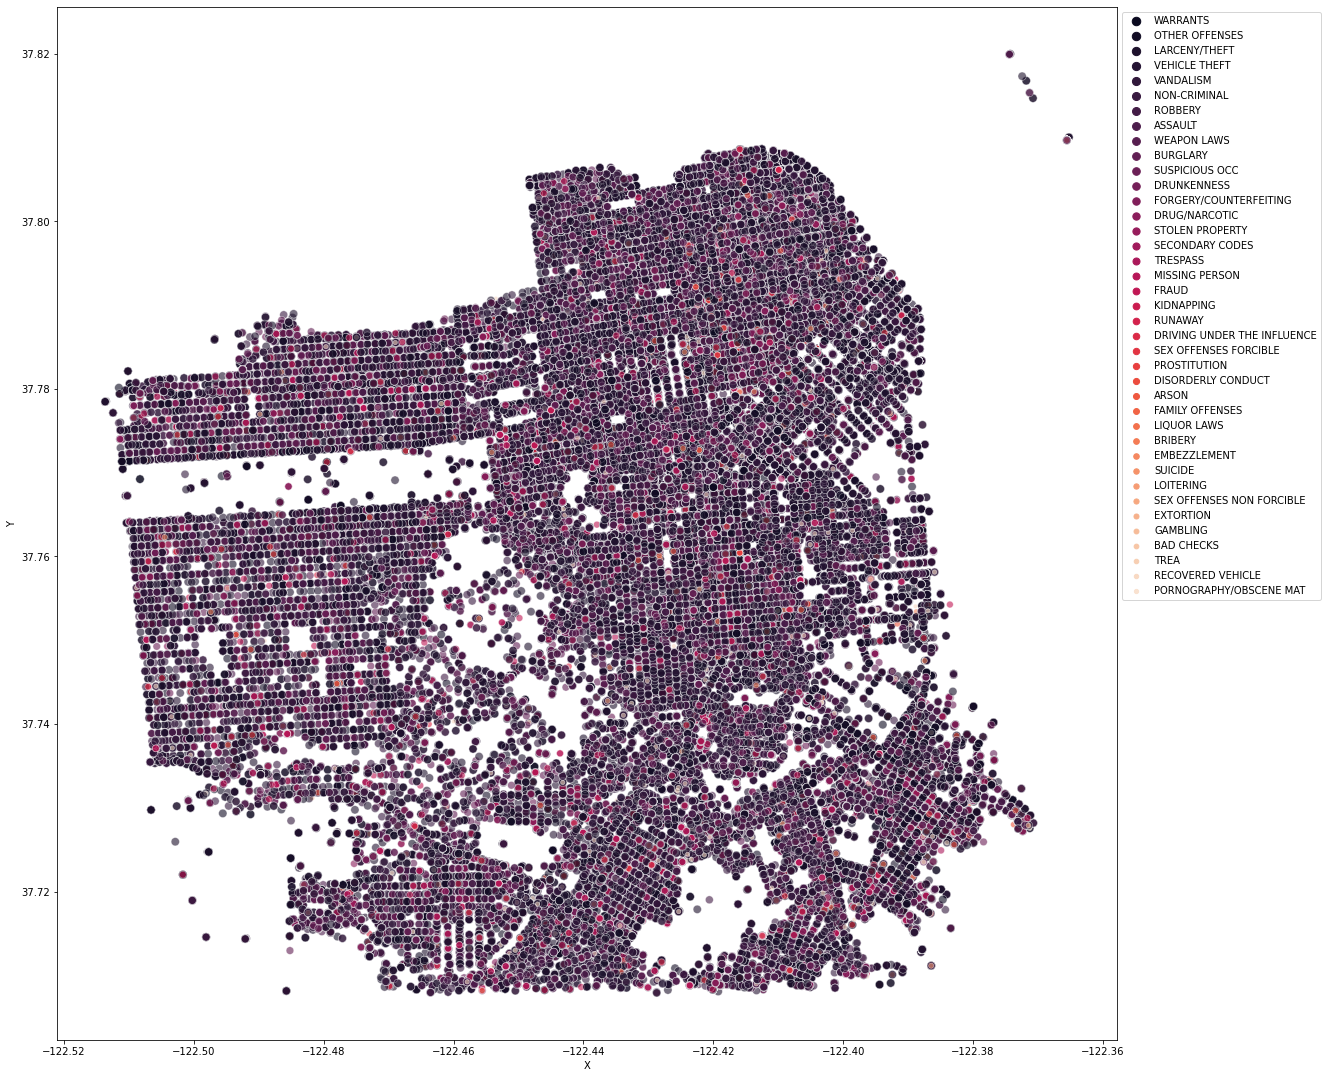

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(19, 19))
sns.scatterplot(data=train.iloc[:250000], x='X', y='Y', alpha=0.6, palette='rocket', hue='Category', size='Category')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

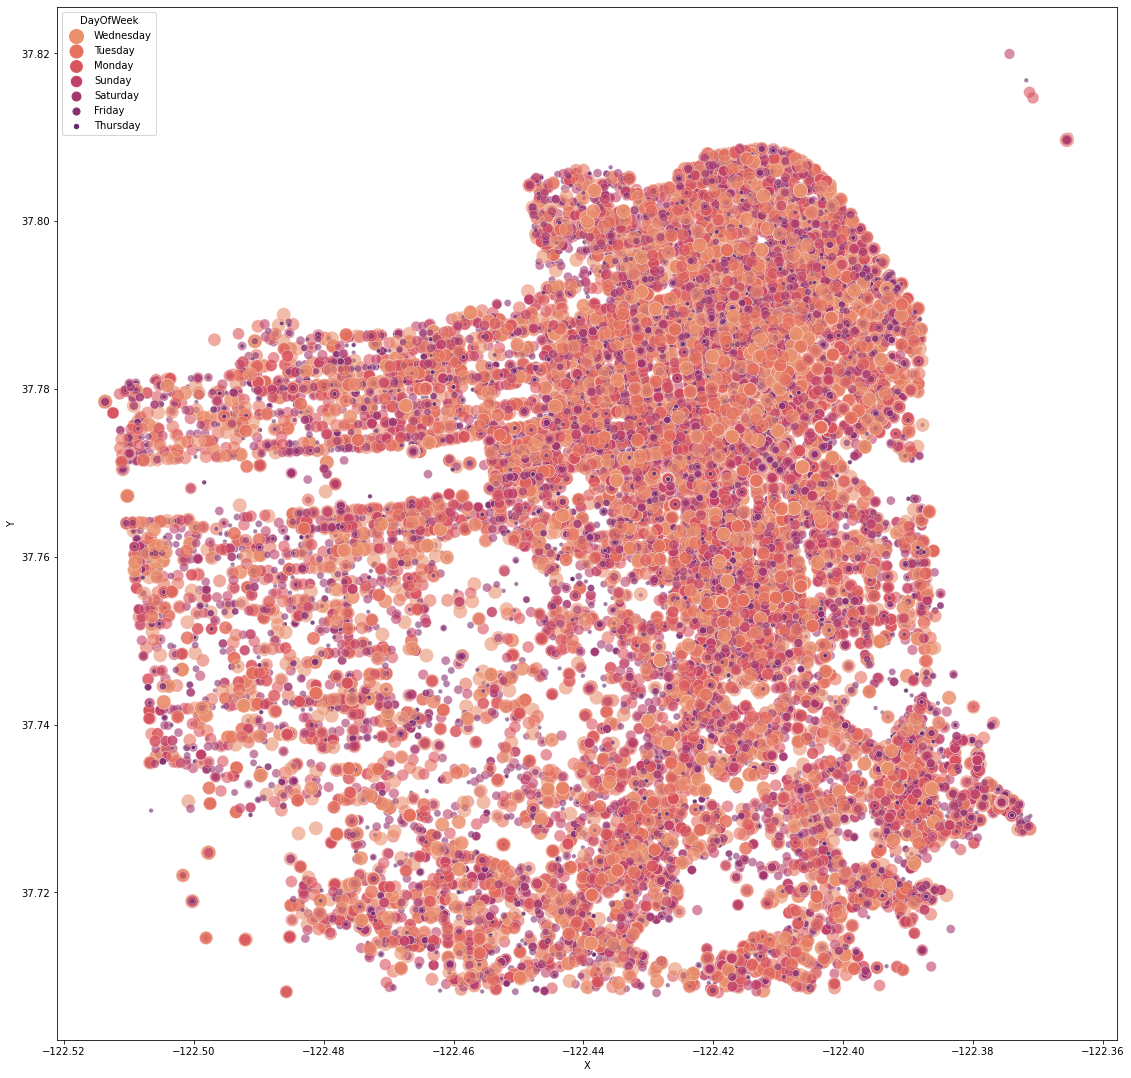

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(19, 19))
sns.scatterplot(data=train.iloc[:50000], x='X', y='Y', alpha=0.6, palette='flare', hue='DayOfWeek',size='DayOfWeek', sizes=(20, 200), markers=True)
plt.show()

In [20]:
train_query = train[(train['Category']=='WARRANTS') & (train['Resolution']=='ARREST, BOOKED')][['Y','X']]
m = folium.Map(location=[37.774599, -122.425892], zoom_start=13, tiles='stamentoner', min_zoom=12, max_zoom=14) # HeatmapPlot-tiles : cartodbdark_matter
train_query_geo_list = train_query.values.tolist()
HeatMap(train_query_geo_list, blur=2, radius=3).add_to(m)
m

In [21]:
query_freq_list = train['Category'].unique()
train_sigma = train.loc[train['Category'].isin(query_freq_list)]

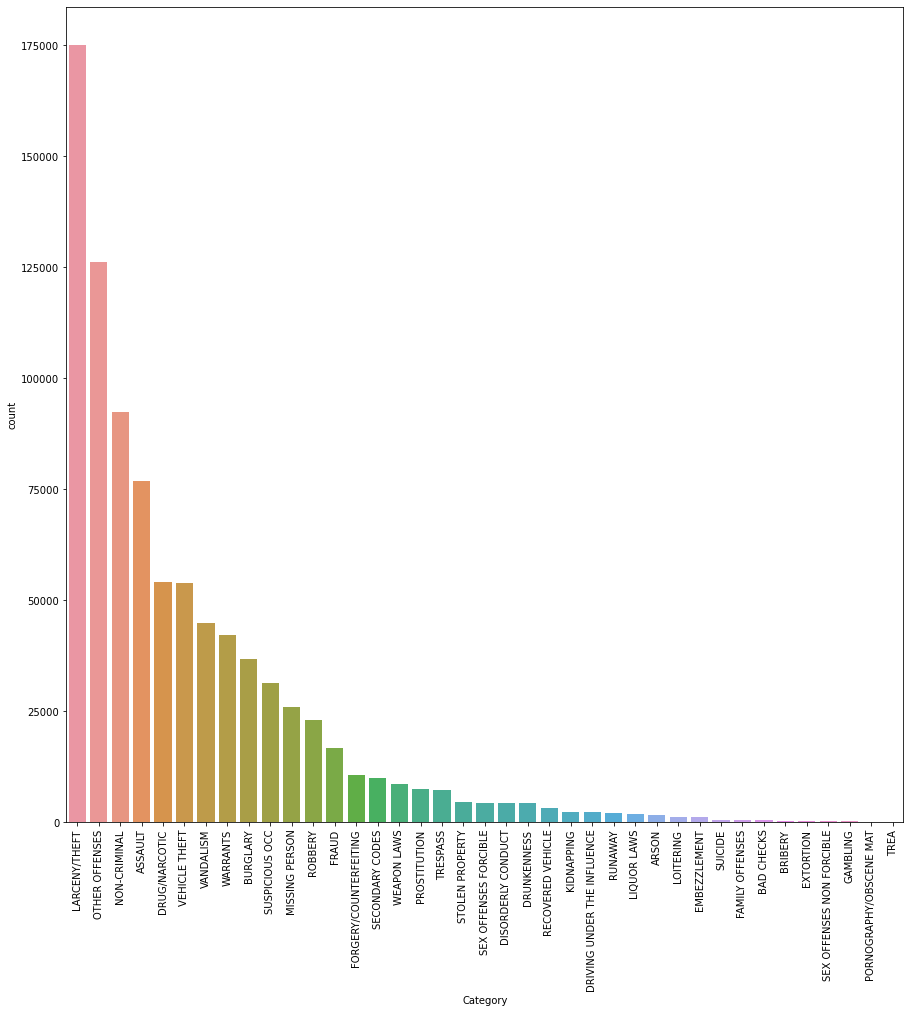

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.countplot(x='Category', data=train_sigma, order=train_sigma['Category'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
   

In [23]:
cross_tab_train = pd.crosstab(train_sigma['Category'], train_sigma['PdDistrict'])

cross_tab_train.style.background_gradient()


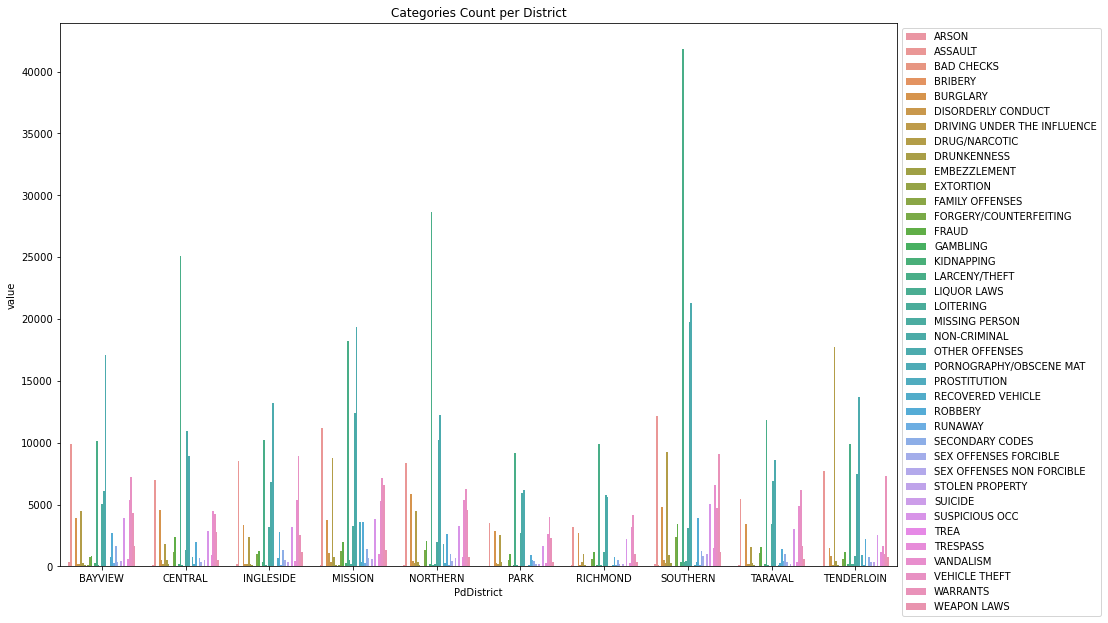

In [24]:
stack_sigma_list = cross_tab_train.stack().reset_index().rename(columns= {0:'value'})
fig, ax = plt.subplots(1, 1, figsize= (15,10))
sns.barplot(x=stack_sigma_list['PdDistrict'], y=stack_sigma_list['value'], hue=stack_sigma_list['Category'])
ax.set_title('Categories Count per District')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

In [25]:
frequency_c = pd.DataFrame(train['Category'].value_counts(normalize=True))
frequency_c.reset_index(inplace=True)
frequency_c.rename({'index': 'Category', 'Category': 'Freq'}, axis=1, inplace=True)
frequency_c['Cumsum_Freq'] = frequency_c['Freq'].cumsum()
frequency_50_list = list(frequency_c.loc[frequency_c['Cumsum_Freq'] < 0.8, 'Category'])

Text(0.5, 1.0, 'Categories Count per District')

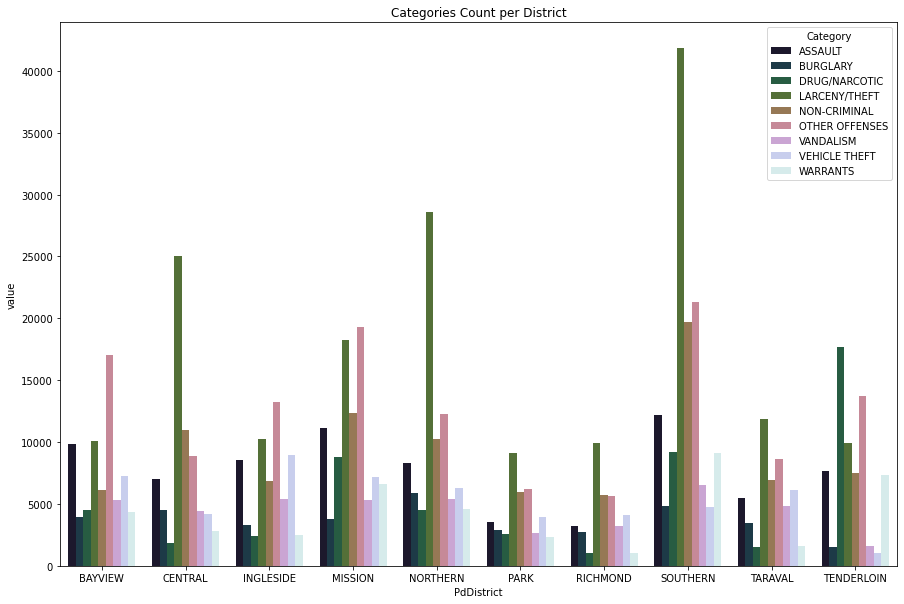

In [26]:
train_50_list = train.loc[train['Category'].isin(frequency_50_list)]
ct_50_list = pd.crosstab(train_50_list['Category'], train_50_list['PdDistrict'])
stack_50_list = ct_50_list.stack().reset_index().rename(columns= {0:'value'})

fig, ax = plt.subplots(1, 1, figsize= (15,10))
sns.barplot(x=stack_50_list['PdDistrict'], y=stack_50_list['value'], hue=stack_50_list['Category'], palette='cubehelix')
ax.set_title('Categories Count per District')